In [1]:
# Import
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\RIYA SUMRA\AppData\Local\Temp\ipykernel_9356\2824977193.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [9]:
# Path
path = 'C:\\Users\\RIYA SUMRA\\Downloads\\KaggleProjects-main\\Salary_Data.csv'

In [29]:
# Loading the dataset
data = pd.read_csv(path)

# Head
data.head(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0
6,42.0,Female,Master's,Product Manager,12.0,120000.0
7,31.0,Male,Bachelor's,Sales Manager,4.0,80000.0
8,26.0,Female,Bachelor's,Software Engineer,1.0,45000.0
9,38.0,Male,PhD,Senior Scientist,10.0,110000.0


In [30]:
# Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [31]:
# Basic stats (Numerical)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,373.0,37.431635,7.069073,23.0,31.0,36.0,44.0,53.0
Years of Experience,373.0,10.030831,6.557007,0.0,4.0,9.0,15.0,25.0
Salary,373.0,100577.345845,48240.013482,350.0,55000.0,95000.0,140000.0,250000.0


In [32]:
# Basic stats (Categorical)
data.describe(include="object").T

,count,unique,top,freq
Gender,373,2,Male,194
Education Level,373,3,Bachelor's,224
Job Title,373,166,Software Engineer,20


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Years of Experience'}>],
       [<Axes: title={'center': 'Salary'}>, <Axes: >]], dtype=object)

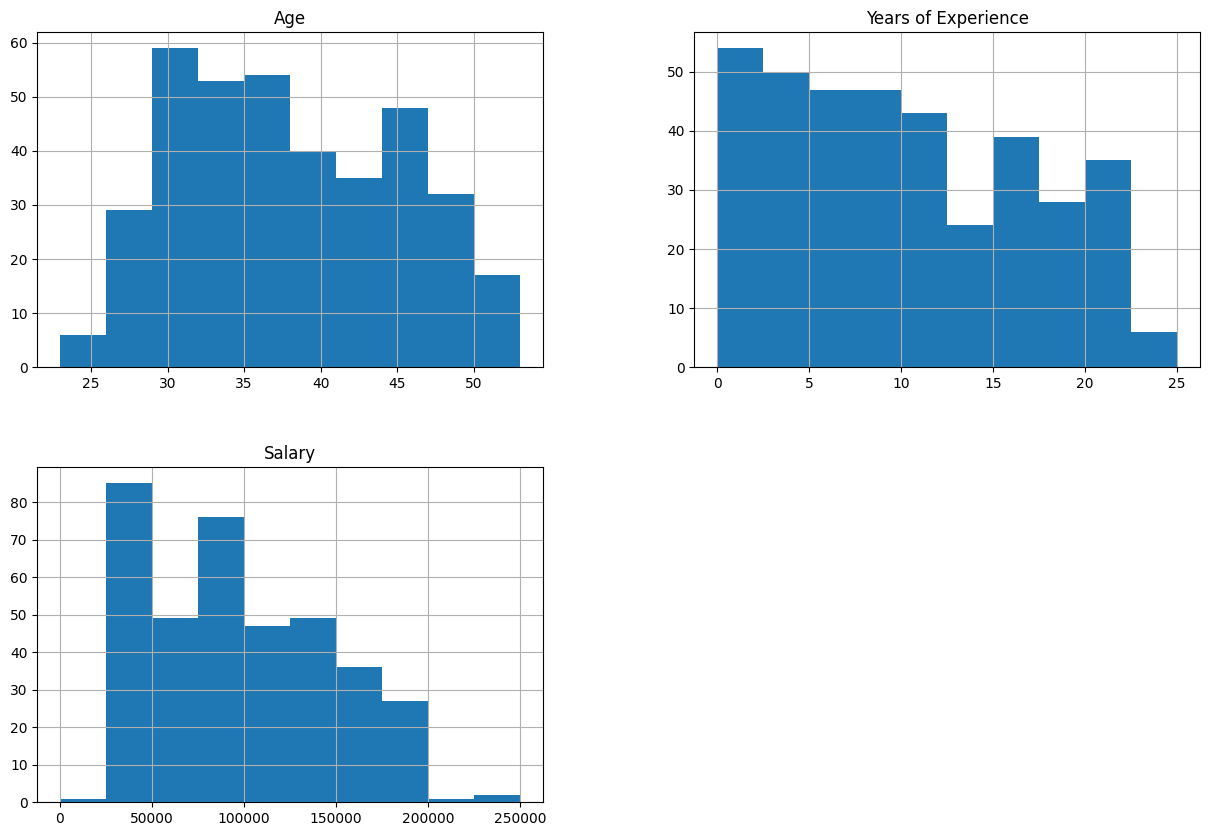

In [33]:
# Distribution of quantitive data
data.hist(figsize=(15,10))

C:\Users\RIYA SUMRA\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\RIYA SUMRA\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\RIYA SUMRA\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset =

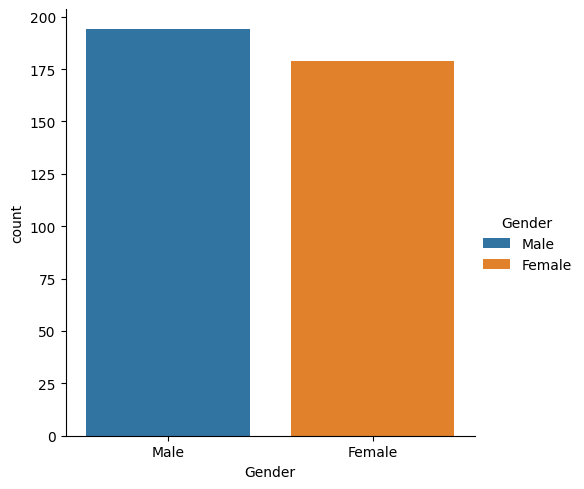

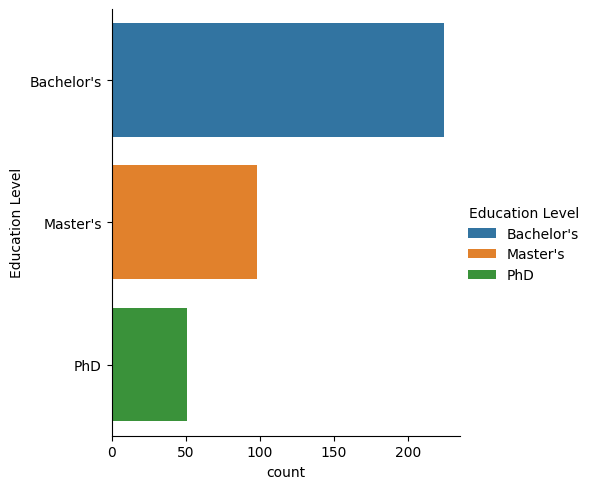

In [38]:
# distribution of qualitative data
seaborn.catplot(data=data,x = "Gender", kind="count", hue= "Gender")
seaborn.catplot(data=data,y = "Education Level", kind="count", hue= "Education Level")

In [39]:
# Unique Values in Education Level column
data["Education Level"].unique()

array(["Bachelor's", "Master's", 'PhD', nan], dtype=object)

In [40]:
# Sum of missing/NAN values
data.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [41]:
# Dropping rows with missing/NAN values
data = data.dropna()

# Recheck
data.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

### **Synopsis**: The higher the experience, the better the pay gets with respect to the field/job title. The line graph below doesn't take job/field into account.

<Axes: xlabel='Years of Experience', ylabel='Salary'>

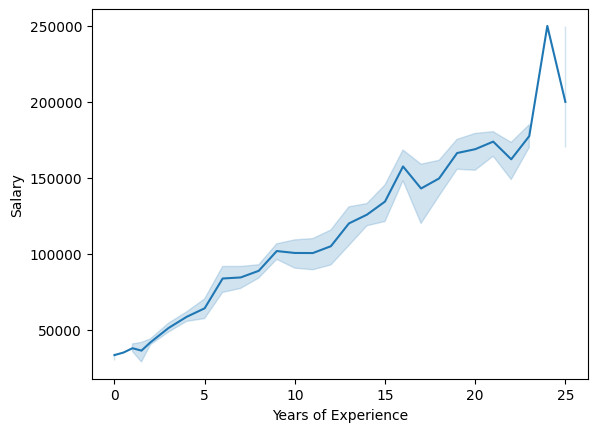

In [42]:
seaborn.lineplot(data = data,x = "Years of Experience",y = "Salary")

> Selecting Rows with 'Software Engineer' as title

In [43]:
# Filtering Data
swedata =  data.loc[data["Job Title"] == 'Software Engineer']

# Peeking in swedata
swedata.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
8,26.0,Female,Bachelor's,Software Engineer,1.0,45000.0
17,39.0,Male,PhD,Software Engineer,12.0,115000.0
26,37.0,Female,Master's,Software Engineer,11.0,110000.0
42,30.0,Male,Bachelor's,Software Engineer,3.0,60000.0


In [44]:
# Shape of the new dataframe
swedata.shape

(20, 6)

In [45]:
# Basic stats (Numerical)
swedata.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,20.0,35.90,6.904613,26.0,32.0,34.5,40.0,50.0
Years of Experience,20.0,8.95,6.194012,1.0,5.0,7.0,13.0,22.0
Salary,20.0,93500.00,35729.244987,35000.0,63750.0,97500.0,116250.0,160000.0


In [46]:
# Basic stats (Categorical)
swedata.describe(include = "object").T

,count,unique,top,freq
Gender,20,2,Male,15
Education Level,20,3,Bachelor's,12
Job Title,20,1,Software Engineer,20


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Years of Experience'}>],
       [<Axes: title={'center': 'Salary'}>, <Axes: >]], dtype=object)

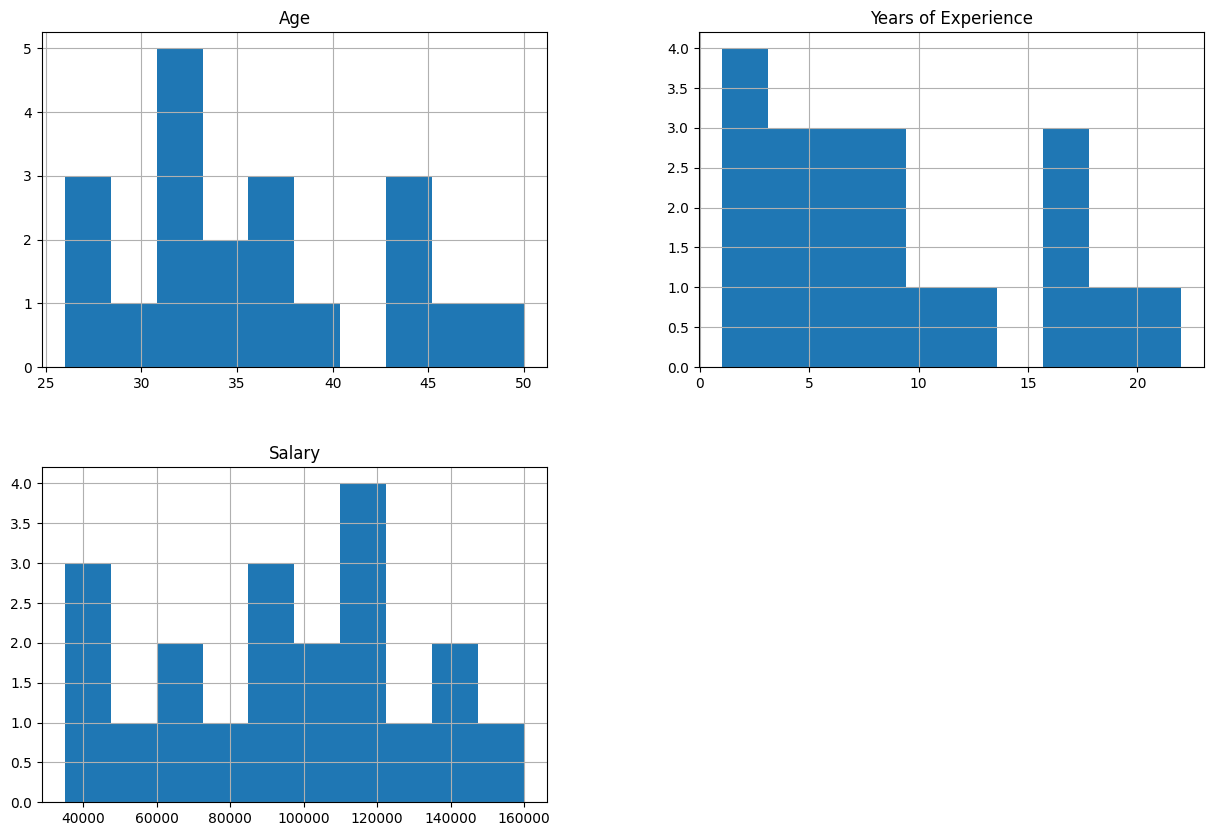

In [47]:
# Distribution
swedata.hist(figsize=(15,10))

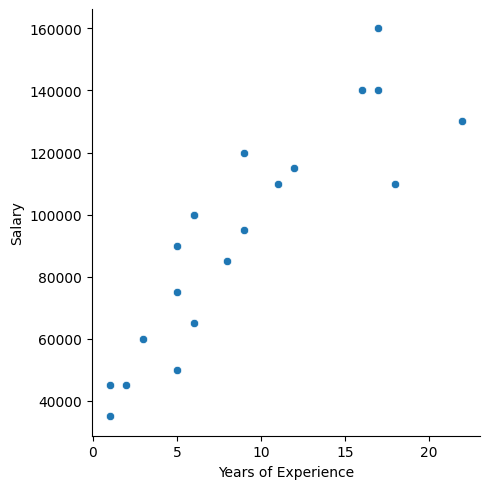

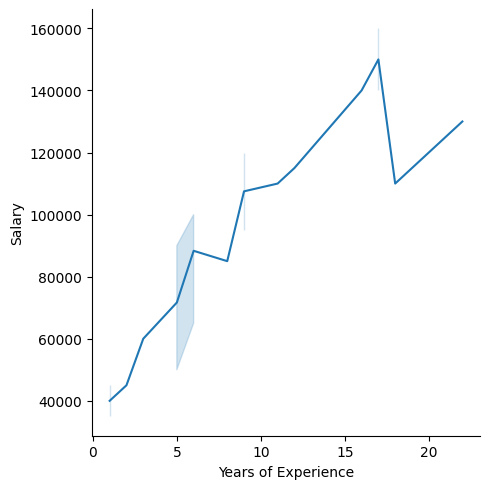

In [48]:
# Experience (x) vs Salary (y) plot
seaborn.relplot(swedata, x = 'Years of Experience', y = 'Salary')
seaborn.relplot(swedata, x = 'Years of Experience', y = 'Salary', kind = 'line')

<Axes: xlabel='Years of Experience', ylabel='Salary'>

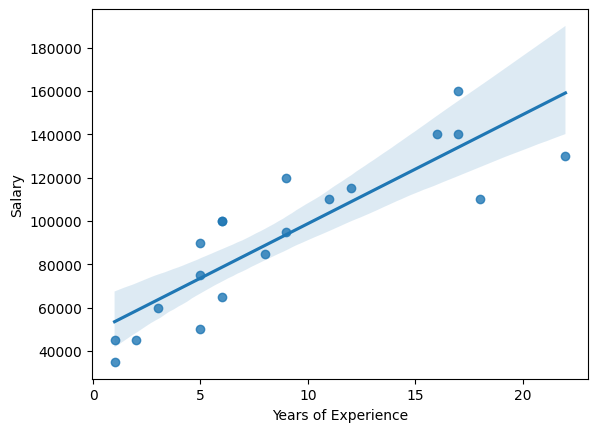

In [49]:
# Regression Plot
seaborn.regplot(swedata, x = 'Years of Experience', y = 'Salary')

# Simple Regression

In [50]:
# Splitting the data for model training
# features = swedata.drop(['Salary'], axis=1).values
features = swedata[['Years of Experience']]
label = swedata['Salary']
Ftrain, Ftest, Ltrain, Ltest = train_test_split(features, label, test_size=0.2)

In [51]:
# Training the model
model = LinearRegression()

# Fitting the data
model.fit(Ftrain, Ltrain)

LinearRegression()

In [52]:
# Evaluation 
model.score(Ftest, Ltest)

0.7839153581449201

# Multiple Regression

#### Now I will try to estimate the salary while taking the experience and education label into account. 

In [53]:
# Unique values of Education Level
swedata['Education Level'].unique()

array(["Bachelor's", 'PhD', "Master's"], dtype=object)

> While examining the education label column, I noticed that some column had the degree as i.e. "Bachelor's" while some other had "Bachelor's degree". What does this imply? I checked the data page on kaggle but it doesn't address anything about it. What I think that the rows with education as 'Degree_Name' could imply the person was either a student or dropped out in the middle while 'Degree Name' actually completed the degree. I could be wrong. But to keep everything simple, I will assume that everyone on this data finished their degree and this is just random formatting issue. So, I will change the formats into a singular one.

In [54]:
swedata.loc[swedata['Education Level'].str.contains("Bachelor"), 'Education Level'] = 'Bachelors'
swedata.loc[swedata['Education Level'].str.contains("Master"), 'Education Level'] = 'Masters'

# Unique values now
swedata['Education Level'].unique()

array(['Bachelors', 'PhD', 'Masters'], dtype=object)

## One Hot Encoding

In [55]:
# Encoding the education label: One-Hot-Encoding
HotOne = swedata.copy()
ohencoded = pd.get_dummies(HotOne, columns = ['Education Level'], dtype=int)
ohencoded.head()

,Age,Gender,Job Title,Years of Experience,Salary,Education Level_Bachelors,Education Level_Masters,Education Level_PhD
0,32.0,Male,Software Engineer,5.0,90000.0,1,0,0
8,26.0,Female,Software Engineer,1.0,45000.0,1,0,0
17,39.0,Male,Software Engineer,12.0,115000.0,0,0,1
26,37.0,Female,Software Engineer,11.0,110000.0,0,1,0
42,30.0,Male,Software Engineer,3.0,60000.0,1,0,0


In [59]:
# Preparing & splitting dataset
ohefeatures = ohencoded[['Education Level_Masters', 'Education Level_Bachelors', 'Years of Experience']]
ohelabel = ohencoded[['Salary']]
ohf_train, ohf_test, ohl_train, ohl_test = train_test_split(ohefeatures, ohelabel, test_size = 0.2)

In [60]:
# Training the model
model_2 = LinearRegression()
model_2.fit(ohf_train, ohl_train)

LinearRegression()

In [61]:
# Evaluation
model_2.score(ohf_test, ohl_test)

0.8525361594423517